Extracting Dataset using Kaggle API

In [1]:
#installing the kaggle library
!pip  install kaggle

In [2]:
#configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle API
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:07<00:00, 117MB/s]
100% 812M/812M [00:07<00:00, 111MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [6]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path , dirs , files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:' , file_count)

Number of images: 25000


### Printing the name of the images

In [8]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.5386.jpg', 'cat.3268.jpg', 'dog.4539.jpg', 'dog.6452.jpg', 'dog.3764.jpg', 'cat.5829.jpg', 'dog.1161.jpg', 'dog.1906.jpg', 'cat.1479.jpg', 'dog.8578.jpg', 'dog.9013.jpg', 'cat.8594.jpg', 'cat.4722.jpg', 'cat.10864.jpg', 'cat.8722.jpg', 'cat.3938.jpg', 'dog.11048.jpg', 'dog.3072.jpg', 'dog.3127.jpg', 'dog.382.jpg', 'dog.9767.jpg', 'dog.11815.jpg', 'dog.7675.jpg', 'dog.9195.jpg', 'cat.1600.jpg', 'dog.5551.jpg', 'dog.10179.jpg', 'cat.1464.jpg', 'dog.2403.jpg', 'cat.1053.jpg', 'cat.6019.jpg', 'dog.4996.jpg', 'cat.2224.jpg', 'cat.1.jpg', 'cat.12474.jpg', 'cat.11538.jpg', 'cat.3845.jpg', 'cat.4011.jpg', 'cat.1471.jpg', 'cat.596.jpg', 'dog.7230.jpg', 'dog.9796.jpg', 'cat.8574.jpg', 'cat.480.jpg', 'cat.3053.jpg', 'cat.1763.jpg', 'cat.9553.jpg', 'cat.7765.jpg', 'cat.287.jpg', 'cat.5232.jpg', 'dog.9883.jpg', 'dog.2455.jpg', 'cat.5251.jpg', 'dog.11130.jpg', 'cat.3358.jpg', 'cat.6737.jpg', 'cat.2710.jpg', 'dog.3275.jpg', 'dog.213.jpg', 'dog.5734.jpg', 'dog.2149.jpg', 'dog.11103.jpg', 'cat.94

Importing the Dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## Display the images of dog and cats

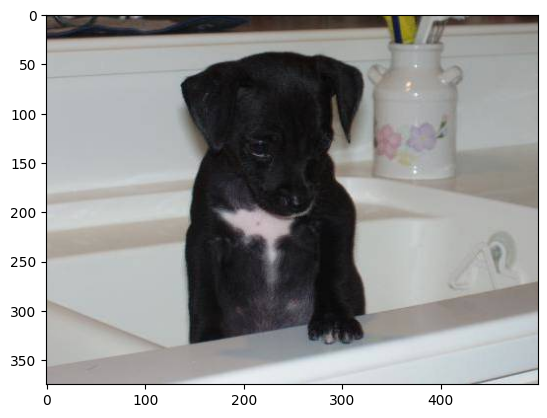

In [10]:
# display the image
img = mping.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

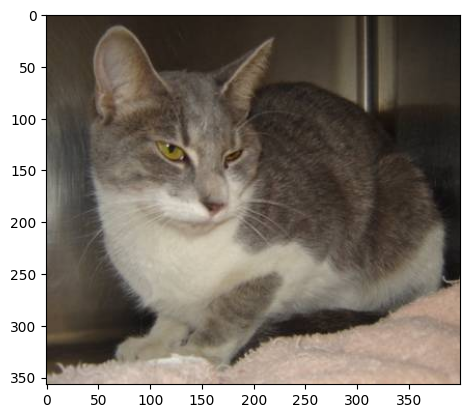

In [11]:
# display the image
img = mping.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
cat
dog
dog
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count +=1

  else:
    cat_count +=1

print('Number of dog images = ' , dog_count)
print('Number of cat iamges = ' , cat_count)

Number of dog images =  12500
Number of cat iamges =  12500


Resizing all the images

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224 ,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

<function matplotlib.pyplot.show(close=None, block=None)>

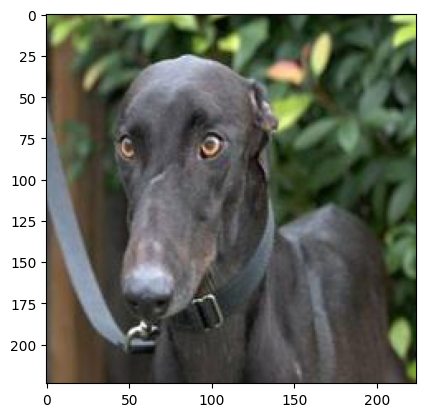

In [16]:
img = mping.imread('/content/image resized/dog.1063.jpg')
imgplt = plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

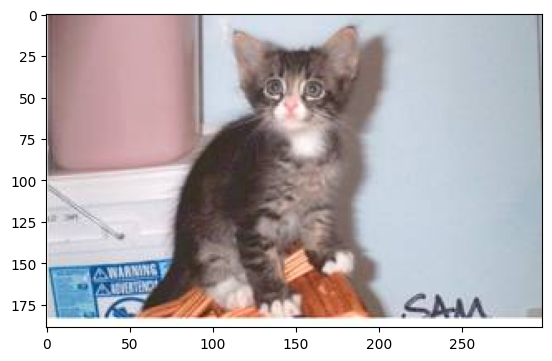

In [19]:
# display cat image
image = mping.imread('/content/train/cat.4351.jpg')
imgplt = plt.imshow(image)
plt.show

Creating labels for resized images of dog and cats

Cat --> 0


Dog --> 1

In [20]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [22]:
print(filenames[0:5])
print(len(labels))

['dog.5386.jpg', 'cat.3268.jpg', 'dog.4539.jpg', 'dog.6452.jpg', 'dog.3764.jpg']
2000


In [23]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 1]
2000


In [24]:
# countig the images of the dog and cats out of 2000 images
values , counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[ 961 1039]


Converting all the resized images to numpy array

In [25]:
import cv2
import glob

In [26]:
image_directory = '/content/image resized/'
image_extension = ['png' , 'jpg']

files = [ ]

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[111 127 140]
   [111 127 140]
   [111 127 140]
   ...
   [109 113 124]
   [ 52  58  69]
   [ 15  21  32]]

  [[111 127 140]
   [111 127 140]
   [111 127 140]
   ...
   [119 123 134]
   [ 59  65  76]
   [  6  12  23]]

  [[111 127 140]
   [111 127 140]
   [111 127 140]
   ...
   [126 131 140]
   [ 75  82  91]
   [ 16  23  32]]

  ...

  [[ 52  62  79]
   [ 54  64  81]
   [ 52  64  82]
   ...
   [ 55  75 110]
   [ 56  75 112]
   [ 56  75 112]]

  [[ 49  59  76]
   [ 49  59  76]
   [ 46  59  75]
   ...
   [ 57  77 112]
   [ 56  75 112]
   [ 55  74 111]]

  [[ 39  49  66]
   [ 41  51  68]
   [ 42  55  71]
   ...
   [ 50  70 105]
   [ 47  66 103]
   [ 46  65 102]]]


 [[[  6  27  18]
   [  5  26  17]
   [  5  26  18]
   ...
   [219 247 228]
   [221 249 230]
   [221 251 232]]

  [[  6  27  18]
   [  5  26  17]
   [  5  26  18]
   ...
   [216 244 225]
   [218 246 227]
   [218 248 229]]

  [[  6  27  19]
   [  5  26  18]
   [  5  26  18]
   ...
   [213 241 222]
   [215 243 224]
   [216 246

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

### Train Test Split

In [32]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size =0.2,random_state=2)

In [33]:
print(X.shape , X_train.shape , X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> testing images

In [34]:
# Scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [35]:
print(X_train_scaled)

[[[[0.68235294 0.5372549  0.40392157]
   [0.68627451 0.54117647 0.40784314]
   [0.69411765 0.54901961 0.41568627]
   ...
   [0.61960784 0.48627451 0.36862745]
   [0.63137255 0.49019608 0.37254902]
   [0.63529412 0.49411765 0.37647059]]

  [[0.70980392 0.56470588 0.43137255]
   [0.70980392 0.56470588 0.43137255]
   [0.70588235 0.56078431 0.42745098]
   ...
   [0.62352941 0.48627451 0.35686275]
   [0.63137255 0.49019608 0.37254902]
   [0.63921569 0.50196078 0.37254902]]

  [[0.7372549  0.59215686 0.45882353]
   [0.72941176 0.58431373 0.45098039]
   [0.72156863 0.57647059 0.44313725]
   ...
   [0.66666667 0.52156863 0.38823529]
   [0.67843137 0.52941176 0.40392157]
   [0.68627451 0.54117647 0.40784314]]

  ...

  [[0.56862745 0.41568627 0.30588235]
   [0.57254902 0.41960784 0.30980392]
   [0.57647059 0.42352941 0.31372549]
   ...
   [0.65490196 0.5372549  0.43921569]
   [0.63529412 0.51372549 0.41568627]
   [0.61568627 0.49411765 0.39607843]]

  [[0.57254902 0.41960784 0.30980392]
   [0.5

**Building the Nueral Network**

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model , input_shape=(224,224,3) ,trainable=False)

In [42]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [45]:
model.fit(X_train_scaled , Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 79s 1s/step - loss: 0.2265 - acc: 0.9081
Epoch 2/5
50/50 [==============================] - 97s 2s/step - loss: 0.0761 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 74s 1s/step - loss: 0.0618 - acc: 0.9800
Epoch 4/5
50/50 [==============================] - 82s 2s/step - loss: 0.0491 - acc: 0.9862
Epoch 5/5
50/50 [==============================] - 101s 2s/step - loss: 0.0422 - acc: 0.9887


In [47]:
score ,acc = model.evaluate(X_test_scaled ,Y_test)
print('Test Loss = ',score)
print('Test Accuracy = ' , acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0794 - acc: 0.9725
Test Loss =  0.07935339957475662
Test Accuracy =  0.9725000262260437


Predictive System

In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image , (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled , [1,224,224,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
  print('The Image represents a Cat')

else:
  print('The Image represents a Dog')